<a href="https://colab.research.google.com/github/mehadisaki/Sales-Forecasting-model-development-/blob/main/Sales_Forecasting_model_development_fbprophet%C2%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! pip install fbprophet

In [ ]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/My Drive/TS - forcast project/image'

Mounted at /content/gdrive


In [ ]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)


Prophet 0.7.1


# Data

In [ ]:
url = 'https://github.com/mehadisaki/Sales-Forecasting-model-development-/blob/main/TV%20Delivery_2016-2022.xlsx?raw=true'
# taking link from view raw'

## indexing with datetime
df =pd.read_excel(url,index_col='Month',parse_dates=['Month'])
df.sort_index(inplace = True)


In [ ]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-02-01', '2016-02-01',
               ...
               '2022-02-01', '2022-02-01', '2022-02-01', '2022-02-01',
               '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
               '2022-03-01', '2022-03-01'],
              dtype='datetime64[ns]', name='Month', length=632, freq=None)

In [ ]:
# select 32" TV
#. selecting delivery and time data fro dataframe
df32= df.loc[df["SIZE"] == "32\" ( 813 mm )"]


In [ ]:
df32.head()

,SIZE,Year,Delivery
Month,,,
2016-01-01,"32"" ( 813 mm )",2016,4513
2016-02-01,"32"" ( 813 mm )",2016,5225
2016-03-01,"32"" ( 813 mm )",2016,5583
2016-04-01,"32"" ( 813 mm )",2016,5493
2016-05-01,"32"" ( 813 mm )",2016,4864


In [ ]:
df32.reset_index(inplace=True)
data = df32.rename(columns = {'index':'date'})


In [ ]:
data = data[['Month','Delivery']]
data.columns= ['ds','y']

In [ ]:
data.head()

,ds,y
0,2016-01-01,4513
1,2016-02-01,5225
2,2016-03-01,5583
3,2016-04-01,5493
4,2016-05-01,4864


In [ ]:
#Split into test and train data
train_data, test_data = train_test_split(data, test_size=0.20, shuffle = False)

print(test_data)

           ds      y
60 2021-01-01  22280
61 2021-02-01  24766
62 2021-03-01  35036
63 2021-04-01  23637
64 2021-05-01  20327
65 2021-06-01  24397
66 2021-07-01  18657
67 2021-08-01  16855
68 2021-09-01  39200
69 2021-10-01  20594
70 2021-11-01  18689
71 2021-12-01  15909
72 2022-01-01  22520
73 2022-02-01  26059
74 2022-03-01  24387


In [ ]:
# create test dataset, remove last 6 months
#train = data.drop(data.index[-6:])
#test = data.iloc[len(data)-12:]

In [ ]:
# define the model
model = Prophet()
# fit the mode
fbfit= model.fit(train_data)
#future = fbfit.make_future_dataframe(periods=3,freq='MS')
prophet_pred = fbfit.predict(test_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10,2021-11-01,28956.350855,18223.468323,34936.048081,28956.350257,28956.351398,-2116.514453,-2116.514453,-2116.514453,-2116.514453,-2116.514453,-2116.514453,0.0,0.0,0.0,26839.836402
11,2021-12-01,29282.497516,23479.672307,40030.134373,29282.496833,29282.498153,2796.478925,2796.478925,2796.478925,2796.478925,2796.478925,2796.478925,0.0,0.0,0.0,32078.976441
12,2022-01-01,29619.515732,25036.716431,40970.092329,29619.514914,29619.516464,3121.941069,3121.941069,3121.941069,3121.941069,3121.941069,3121.941069,0.0,0.0,0.0,32741.456801
13,2022-02-01,29956.533948,22067.167655,38125.145868,29956.533031,29956.534769,294.849308,294.849308,294.849308,294.849308,294.849308,294.849308,0.0,0.0,0.0,30251.383256
14,2022-03-01,30260.937499,21182.697454,37694.967316,30260.936490,30260.938405,-833.135484,-833.135484,-833.135484,-833.135484,-833.135484,-833.135484,0.0,0.0,0.0,29427.802015


          ds          yhat    yhat_lower    yhat_upper
0 2021-01-01  30708.842069  22539.126043  39112.156214
1 2021-02-01  29699.186825  21446.435550  37897.012436
2 2021-03-01  26493.525209  17976.574514  35010.477098
3 2021-04-01  25485.290849  16746.817500  33775.059525
4 2021-05-01  27327.006704  18721.420894  35878.468584


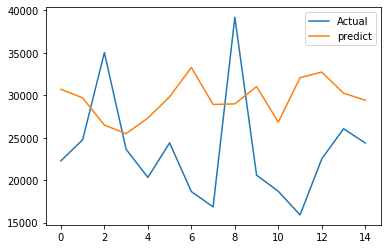

In [ ]:
print(prophet_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
plt.plot(test_data['y'].values, label='Actual')
plt.plot(prophet_pred['yhat'].values,label='predict' )
plt.legend()
plt.savefig('fbprophet_test.png')
plt.savefig(f"{images_dir}/fbprophet_test.png")
plt.show()


In [ ]:
def calculate_error_measures(X, Y):
    
    """
    Function to calculate the mean squared error, mean absolute error and the coefficient of determination (r2) between two lists.
    ...
    Attributes
    ----------
    X : list
    
    Y : list
    
    """
    
        
    MSE = mean_squared_error(X, Y)
    print('Mean Squared Error(MSE): ', MSE)
    
    MAE = mean_absolute_error(X, Y)
    print('Mean Absolute Error(MAE): ', MAE)
    RMSE =mean_squared_error(X, Y,squared=False)
    print('Root Mean Squared Error(RMSE):', RMSE )
    #squared bool, default=True If True returns MSE value, if False returns RMSE value.
    error_measures = [MSE, MAE,RMSE]
    return error_measures

In [ ]:
calculate_error_measures(test_data['y'], prophet_pred['yhat'])

Mean Squared Error(MSE):  86558302.29763132
Mean Absolute Error(MAE):  8486.68945381835
Root Mean Squared Error(RMSE): 9303.671441835815


[86558302.29763132, 8486.68945381835, 9303.671441835815]

In [ ]:
# define the model
model = Prophet()
# fit the mode
fbfit= model.fit(data)
#future = fbfit.make_future_dataframe(periods=6,freq='MS')
fprophet_pred = fbfit.predict(data)



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
calculate_error_measures(data['y'], fprophet_pred['yhat'])

Mean Squared Error(MSE):  45006515.80189352
Mean Absolute Error(MAE):  5510.201754215954
Root Mean Squared Error(RMSE): 6708.689574119041


[45006515.80189352, 5510.201754215954, 6708.689574119041]

          ds          yhat   yhat_lower    yhat_upper
0 2016-01-01   6222.718753 -2561.694299  14463.719816
1 2016-02-01   1241.849244 -7103.498078  10040.602332
2 2016-03-01  12053.087375  3607.543330  20792.191565
3 2016-04-01   3988.188827 -4671.855707  12286.725670
4 2016-05-01   6519.743888 -2741.954041  15700.136631


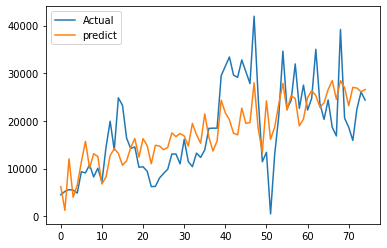

In [ ]:
print(fprophet_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
plt.plot(data['y'].values, label='Actual')
plt.plot(fprophet_pred['yhat'].values,label='predict' )

plt.legend()
plt.savefig('fbprophet_f.png')
plt.savefig(f"{images_dir}/fbprophet_f.png")
plt.show()

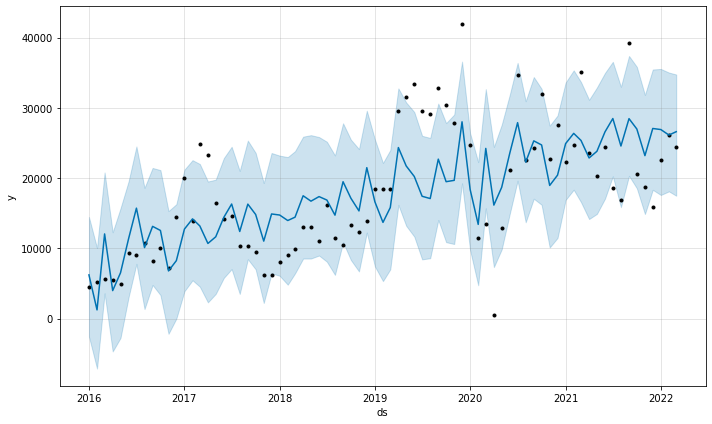

In [ ]:
model.plot(fprophet_pred)
plt.savefig('fbprophet_m.png')
plt.savefig(f"{images_dir}/fbprophet_m.png")
plt.show()